电影评论那个数据集文本语料更多，就选择那个数据集吧。

首先用pandas把comment列读取出来。

In [1]:
import pandas as pd
df=pd.read_csv('movie_comments.csv')
text=df['comment'].values.tolist()

E:\anaconda\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
text[:10]

['吴京意淫到了脑残的地步，看了恶心想吐',
 '首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮番上场，视物理逻辑于不顾，不得不说有钱真好，随意胡闹',
 '吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋律，为了煽情而煽情，让人觉得他是个大做作、大谎言家。（7.29更新）片子整体不如湄公河行动，1.整体不够流畅，编剧有毒，台词尴尬；2.刻意做作的主旋律煽情显得如此不合时宜而又多余。',
 '凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。',
 '中二得很',
 '“犯我中华者，虽远必诛”，吴京比这句话还要意淫一百倍。',
 '脑子是个好东西，希望编剧们都能有。',
 '三星半，实打实的7分。第一集在爱国主旋律内部做着各种置换与较劲，但第二集才真正显露吴京的野心，他终于抛弃李忠志了，新增外来班底让硬件实力有机会和国际接轨，开篇水下长镜头和诸如铁丝网拦截RPG弹头的细节设计都让国产动作片重新封顶，在理念上，它甚至做到《绣春刀2》最想做到的那部分。',
 '开篇长镜头惊险大气引人入胜 结合了水平不俗的快剪下实打实的真刀真枪 让人不禁热血沸腾 特别弹簧床架挡炸弹 空手接碎玻璃 弹匣割喉等帅得飞起！就算前半段铺垫节奏散漫主角光环开太大等也不怕 作为一个中国人 两个小时弥漫着中国强大得不可侵犯的氛围 还是让那颗民族自豪心砰砰砰跳个不停。',
 '15/100吴京的冷峰在这部里即像成龙，又像杰森斯坦森，但体制外的同类型电影，主角总是代表个人，无能的政府需要求助于这些英雄才能解决难题，体现的是个人的价值，所以主旋律照抄这种模式实际上是有问题的。我们以前嘲笑个人英雄主义，却没想到捆绑爱国主义的全能战士更加难以下咽。']

此时text是一个列表，每个元素都是一个评论，我们把每个元素join在一起:

In [3]:
raw=''.join(str(text))

In [4]:
raw[:10]

"['吴京意淫到了脑残"

In [5]:
raw[:500]

"['吴京意淫到了脑残的地步，看了恶心想吐', '首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮番上场，视物理逻辑于不顾，不得不说有钱真好，随意胡闹', '吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋律，为了煽情而煽情，让人觉得他是个大做作、大谎言家。（7.29更新）片子整体不如湄公河行动，1.整体不够流畅，编剧有毒，台词尴尬；2.刻意做作的主旋律煽情显得如此不合时宜而又多余。', '凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。', '中二得很', '“犯我中华者，虽远必诛”，吴京比这句话还要意淫一百倍。', '脑子是个好东西，希望编剧们都能有。', '三星半，实打实的7分。第一集在爱国主旋律内部做着各种置换与较劲，但第二集才真正显露吴京的野心，他终于抛弃李忠志了，新增外来班底让硬件实力有机会和国际接轨，开篇水下长镜头和诸如铁丝网拦截RPG弹头的细节设计都让国产动作片重新封顶，在理念上，它甚至做到《绣春刀2》最想做到的那部分。', '开篇长镜头惊险大气引人入胜 结合了水平不俗的快剪"

可以看到文本中有很多标点符号，空格等等，我们用正则表达式去掉除数字英文中文以外的字符:

In [6]:
import re
clean=re.sub(u'[^0-9a-zA-Z\u4e00-\u9fa5]+','',raw)

In [7]:
clean[:500]

'吴京意淫到了脑残的地步看了恶心想吐首映礼看的太恐怖了这个电影不讲道理的完全就是吴京在实现他这个小粉红的英雄梦各种装备轮番上场视物理逻辑于不顾不得不说有钱真好随意胡闹吴京的炒作水平不输冯小刚但小刚至少不会用主旋律来炒作吴京让人看了不舒服为了主旋律而主旋律为了煽情而煽情让人觉得他是个大做作大谎言家729更新片子整体不如湄公河行动1整体不够流畅编剧有毒台词尴尬2刻意做作的主旋律煽情显得如此不合时宜而又多余凭良心说好看到不像战狼1的续集完虐湄公河行动中二得很犯我中华者虽远必诛吴京比这句话还要意淫一百倍脑子是个好东西希望编剧们都能有三星半实打实的7分第一集在爱国主旋律内部做着各种置换与较劲但第二集才真正显露吴京的野心他终于抛弃李忠志了新增外来班底让硬件实力有机会和国际接轨开篇水下长镜头和诸如铁丝网拦截RPG弹头的细节设计都让国产动作片重新封顶在理念上它甚至做到绣春刀2最想做到的那部分开篇长镜头惊险大气引人入胜结合了水平不俗的快剪下实打实的真刀真枪让人不禁热血沸腾特别弹簧床架挡炸弹空手接碎玻璃弹匣割喉等帅得飞起就算前半段铺垫节奏散漫主角光环开太大等也不怕作为一个中国人两个小时弥漫着中国强大得不可侵'

In [8]:
len(clean)

8016128

接下来进行分词:

In [9]:
import jieba
def cut(string):
    return list(jieba.cut(string))

In [10]:
TOKENS = cut(clean)
len(TOKENS)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\tianchen\AppData\Local\Temp\jieba.cache
Loading model cost 0.541 seconds.
Prefix dict has been built succesfully.


4485222

In [11]:
from collections import Counter
words_count = Counter(TOKENS)
words_count.most_common(20)

[('的', 328256),
 ('了', 102411),
 ('是', 73421),
 ('我', 50510),
 ('都', 36251),
 ('很', 34756),
 ('看', 33853),
 ('电影', 33638),
 ('也', 32064),
 ('和', 31289),
 ('在', 31232),
 ('不', 28474),
 ('有', 27937),
 ('就', 25691),
 ('人', 23806),
 ('好', 22560),
 ('啊', 20784),
 ('这', 17864),
 ('一个', 17343),
 ('还', 17309)]

words_count包含了每个token和其出现的次数。接下来我们作图横轴是token的个数，数轴是token出现的次数。

In [12]:
words_with_fre = [f for w, f in words_count.most_common()]
words_with_fre[:10]

[328256, 102411, 73421, 50510, 36251, 34756, 33853, 33638, 32064, 31289]

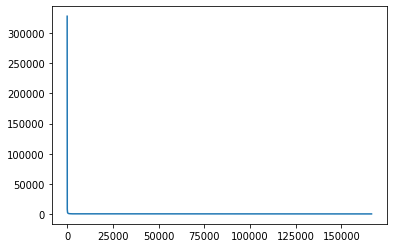

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.plot(words_with_fre)

可以看到这个分布符合长尾效应，即出现频次高的token很少，大多数token出现频次很低。下面用log平滑:

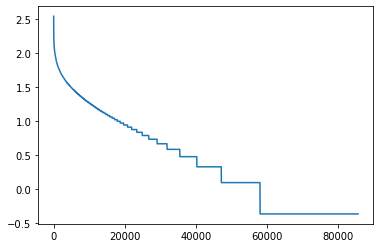

In [14]:
plt.plot(np.log(np.log(words_with_fre)))

### 接下来就是语言模型了，我们先看概率公式:

$$ Pr(sentence) = Pr(w_1 \cdot w_2 \cdots w_n) ≈ Pr(w_1| w_2)Pr(w_2| w_3)\cdots Pr(w_n-1| w_n) = \prod \frac{count(w_i, w_{i+1})}{count(w_{i+1})}$$

对于我们的语言模型Pr()，输入sentence，模型输出sentence的概率。上图的公式是2-gram公式，w是sentence中的每一个token。

所以这里的问题就是计算count(Wi,Wi+1)。首先我们需要获得包含Wi，Wi+1的词汇表:

In [15]:
_2_gram_words = [
    TOKENS[i] + TOKENS[i+1] for i in range(len(TOKENS)-1)
]

In [16]:
TOKENS[:10]

['吴京', '意淫', '到', '了', '脑残', '的', '地步', '看', '了', '恶心']

In [17]:
_2_gram_words[:10]

['吴京意淫', '意淫到', '到了', '了脑残', '脑残的', '的地步', '地步看', '看了', '了恶心', '恶心想']

In [18]:
_2_gram_word_counts = Counter(_2_gram_words)

In [19]:
_2_gram_word_counts.most_common(20)

[('的电影', 8631),
 ('看的', 7075),
 ('都是', 6335),
 ('让人', 5277),
 ('的故事', 4707),
 ('看了', 4537),
 ('也是', 4407),
 ('的时候', 4398),
 ('的是', 4348),
 ('的人', 4344),
 ('看完', 3744),
 ('我的', 3487),
 ('的片子', 3349),
 ('让我', 3271),
 ('这样的', 2852),
 ('这部电影', 2720),
 ('很好', 2624),
 ('电影的', 2551),
 ('不知道', 2539),
 ('的感觉', 2501)]

接下来就是count()。其实这里就是计数，但是为了防止输入的sentence中存在token之外的词语，所以要平滑处理一下。

In [20]:
#输入词语word，n-gram词频表wc(words_count或者_2_gram_word_counts)
def get_gram_count(word, wc):
    if word in wc: 
        return wc[word]
    else:
        return wc.most_common()[-1][-1]   #出现最少token的次数，其实return 1 也可以

好了现在根据上面的公式敲出语言模型Pr()

In [21]:
def Pr(sentence):
    # 这里是2-gram langauge model
    tokens = cut(sentence)  
    probability = 1   
    for i in range(len(tokens)-1):
        word = tokens[i]
        next_word = tokens[i+1]        
        _two_gram_c = get_gram_count(word+next_word, _2_gram_word_counts)   #count(Wi,Wi+1)
        _one_gram_c = get_gram_count(next_word, words_count)                     #count(Wi)
        pro =  _two_gram_c / _one_gram_c                                    #count(Wi,Wi+1)/count(Wi)
        probability *= pro                                                  #Π连乘
    return probability

In [22]:
Pr('电影好看')

0.008684863523573201

In [23]:
Pr('电影不好看')

0.0007740987337540616

当我们能够生成随机的语言并且能判断之后，我们就可以生成更加合理的语言了。请定义 generate_best 函数，该函数输入一个语法 + 语言模型，能够生成n个句子，并能选择一个最合理的句子。

我们这里先引入可以生成n句句子的函数generate_n，对于每一句句子用Pr()打分排序后输出。

生成句子的测试用例见preparatory/3.Random Chinese Sentence Generator.ipynb

In [24]:
#输入字符串，提取规则返回字典。这里传入的参数还有输入字符串中划分statement和expression、expression之间分隔符。
def map(simple_grammar,stmt_split='=', or_split='|'):
    rules = dict() # key is the @statement, value is @expression
    for line in simple_grammar.split('\n'):
        if not line: 
            continue   # skip the empty line
        #print(line)
        stmt, expr = line.split(stmt_split)
        expr=expr.replace('null',' ')    #不替换成空，为了下一行split可以分开，空格之后可以处理掉。其实这里null后面本来就有空格
        #print(expr)
        rules[stmt.strip()] = expr.split(or_split)
    return rules

In [25]:
import random
def generate(rules,target='sentence',trace=0):#trace代表是否追踪生成过程
    global i,j
    if target in rules:                       #target是statement
        candidates = rules[target]            
        candidate = random.choice(candidates) 
        if trace==1:
            print('调用函数第%d次，target=%s，candidate=%s'%(i,target,candidate))
        i+=1        
        return ''.join(generate(rules, target=c.strip(),trace=trace) for c in candidate.split())  #c.strip()把每个expression中的空格去除
    else:                                 #target不是statement，为递归边界直接返回target
        if trace==1:
            print('调用函数第%d次，target=%s，达到递归边界得到生成的第%d个词---------------------我是分割线----------------------'%(i,target,j))
        i+=1
        j+=1
        return target

In [26]:
#生成1句话
def generate_1(simple_grammar,target='sentence',stmt_split='=', or_split='|',trace=0,p=0):   #p代表是否打印生成的句子
    rules=map(simple_grammar,stmt_split=stmt_split, or_split=or_split)              #提取规则
    global i,j                             
    i=1
    j=1
    o=generate(rules, target=target,trace=trace)   #递归生成句子
    if p==1:
        print(o)
    return o

In [43]:
simple_grammar = """
sentence = noun_phrase verb_phrase
noun_phrase = Adj* Job noun
Adj* = null | Adj Adj*
verb_phrase = verb object
object = 篮球 | 战狼 | 叶问 | 大碗宽面 | 鸡你太美 | 上海堡垒
Job =  演员 | 歌手 | 偶像 
noun =   吴京 |  甄子丹 | 吴亦凡 | 蔡徐坤 | 鹿晗
verb = 唱 | 跳 | rap | 出演 | 看 | 扭动 | 特别出演 |友情出演
Adj =   强壮的 |  阴柔的 | 阳刚的 |  太美的"""

In [44]:
map(simple_grammar)

{'sentence': [' noun_phrase verb_phrase'],
 'noun_phrase': [' Adj* Job noun'],
 'Adj*': ['   ', ' Adj Adj*'],
 'verb_phrase': [' verb object'],
 'object': [' 篮球 ', ' 战狼 ', ' 叶问 ', ' 大碗宽面 ', ' 鸡你太美 ', ' 上海堡垒'],
 'Job': ['  演员 ', ' 歌手 ', ' 偶像 '],
 'noun': ['   吴京 ', '  甄子丹 ', ' 吴亦凡 ', ' 蔡徐坤 ', ' 鹿晗'],
 'verb': [' 唱 ', ' 跳 ', ' rap ', ' 出演 ', ' 看 ', ' 扭动 ', ' 特别出演 ', '友情出演'],
 'Adj': ['   强壮的 ', '  阴柔的 ', ' 阳刚的 ', '  太美的']}

In [45]:
generate_1(simple_grammar,p=1)

歌手吴亦凡rap大碗宽面


'歌手吴亦凡rap大碗宽面'

In [46]:
#生成n句话并打分
def generate_n(simple_grammar,n=20,target='sentence',stmt_split='=', or_split='|',trace=0):
    score_list={}
    for i in range(n):
        sentence=generate_1(simple_grammar,target,stmt_split='=', or_split='|',trace=0)
        score_list[sentence]=Pr(sentence)
    score_list=sorted(score_list.items(),key = lambda x:x[1],reverse = True)
    for i in score_list:
        print("%s 得分:%s"%(i[0],i[1]))


In [47]:
generate_n(simple_grammar,33)

演员鹿晗扭动战狼 得分:7.716049382716049e-05
歌手蔡徐坤rap大碗宽面 得分:7.290755322251385e-05
偶像甄子丹扭动战狼 得分:2.6778063410454154e-05
歌手吴京看叶问 得分:8.967162251833784e-06
演员甄子丹跳叶问 得分:6.316201688952331e-06
歌手吴京rap叶问 得分:2.492920106896414e-06
演员吴京出演战狼 得分:3.4045102952391326e-07
演员吴亦凡唱篮球 得分:1.9215618454679963e-07
演员蔡徐坤rap上海堡垒 得分:1.7483825712833057e-07
歌手蔡徐坤友情出演大碗宽面 得分:4.9172645650605725e-08
偶像鹿晗友情出演篮球 得分:5.478005261076252e-09
偶像鹿晗唱上海堡垒 得分:4.755975080117373e-09
歌手蔡徐坤跳上海堡垒 得分:4.097771651445247e-09
太美的偶像鹿晗出演篮球 得分:5.326771747711823e-12
歌手蔡徐坤rap鸡你太美 得分:1.4151633273342418e-12
太美的偶像甄子丹友情出演大碗宽面 得分:2.939232563461902e-13
阳刚的演员甄子丹跳篮球 得分:1.6368568385146565e-13
歌手蔡徐坤跳鸡你太美 得分:3.316789048439629e-14
演员吴京出演鸡你太美 得分:2.3496120610713415e-14
阳刚的歌手吴亦凡特别出演大碗宽面 得分:1.9009138034193413e-15
偶像鹿晗友情出演鸡你太美 得分:8.978991697817958e-16
歌手吴亦凡友情出演鸡你太美 得分:7.346447752760149e-16
强壮的歌手甄子丹唱上海堡垒 得分:6.794841721548734e-16
阴柔的演员吴京特别出演战狼 得分:2.152950634486872e-16
阳刚的阳刚的演员鹿晗rap战狼 得分:1.7472193545000943e-16
强壮的歌手鹿晗特别出演篮球 得分:4.5855376836870077e-17
阴柔的强壮的偶像甄子丹rap叶问 得分:2.533

可以看到演员吴京出演战狼仅仅排在第七，这是数据集的问题因为数据集是影评文本，我们生成的句子是类似出演信息和数据集分布不同。同时模型直接用skip-gram来生成句子的话效果应该更好因为是动态生成的。而这里是静态生成再打分。